In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = sc.read("data_with_PCA_umap_0.3_res.h5ad")

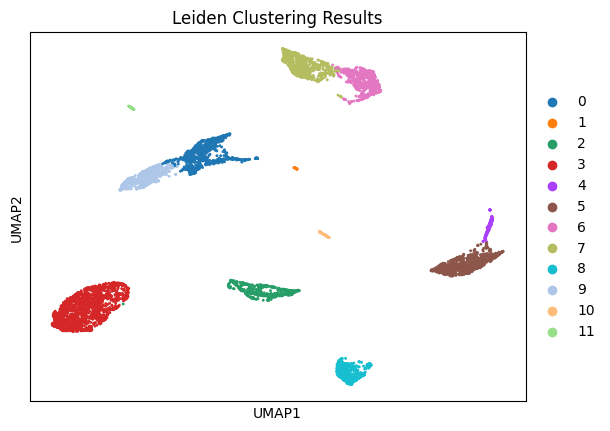

leiden
3     1651
5      958
0      928
7      762
6      671
9      617
2      582
8      511
4      192
10      69
11      50
1       24
Name: count, dtype: int64


In [11]:
# Plot the UMAP with Leiden clustering results
sc.pl.umap(data, color='leiden', title='Leiden Clustering Results')
print(data.obs['leiden'].value_counts())

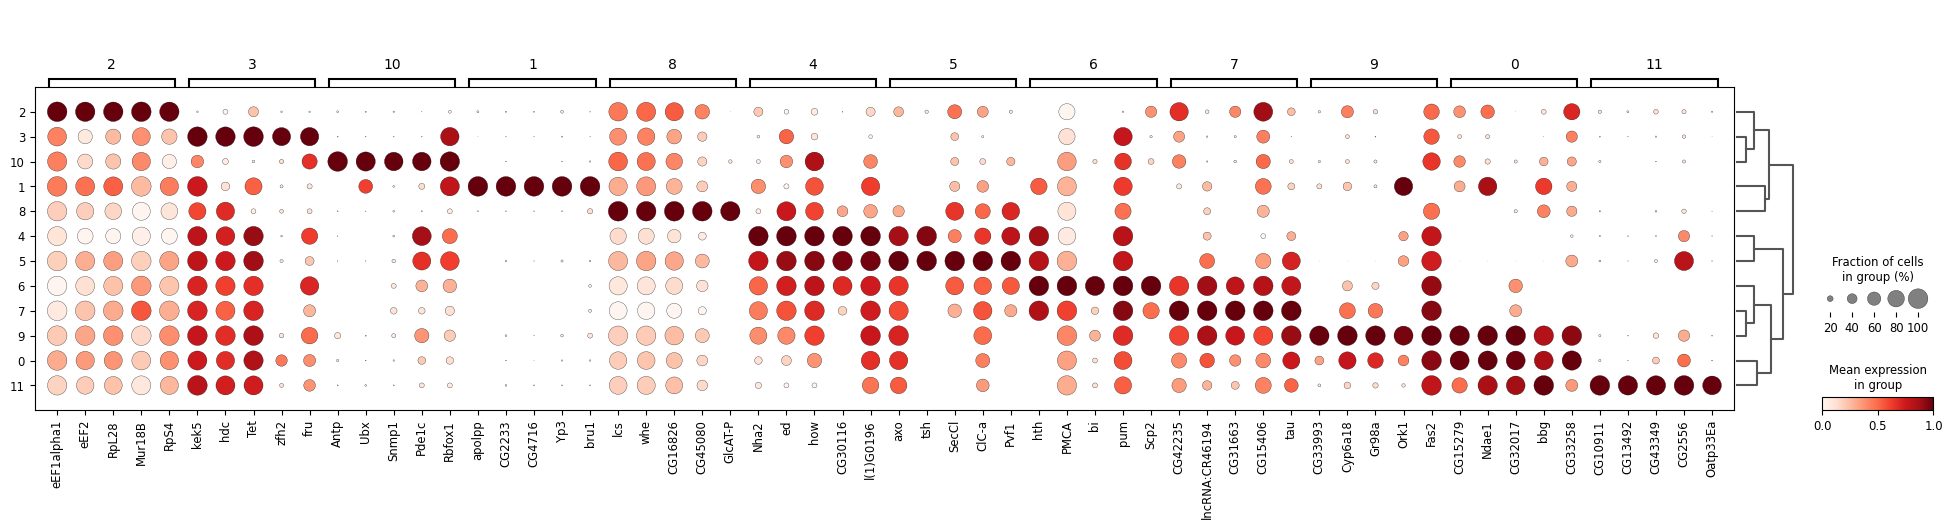

In [5]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(data, groupby="leiden", method="wilcoxon")

sc.pl.rank_genes_groups_dotplot(data, groupby="leiden", standard_scale="var", n_genes=5)

In [ ]:

sc.get.rank_genes_groups_df(data, group="9").head(5)

,names,scores,logfoldchanges,pvals,pvals_adj
0,CG33993,38.987751,10.483888,0.000000e+00,0.000000e+00
1,Cyp6a18,38.074734,8.381689,0.000000e+00,0.000000e+00
2,Gr98a,37.306507,8.289293,1.287269e-304,4.598554e-301
3,Ork1,36.747761,8.872706,1.262358e-295,3.382173e-292
4,Fas2,36.305397,3.982382,1.329850e-288,2.850400e-285


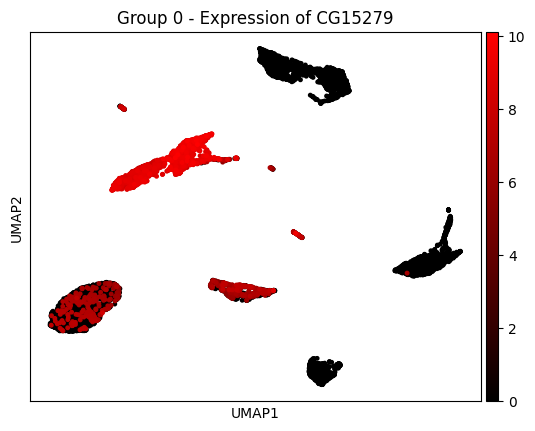

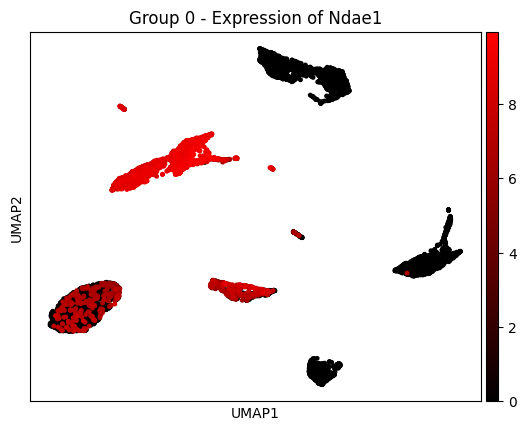

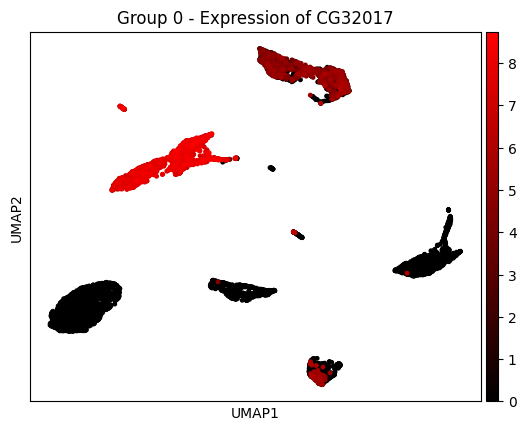

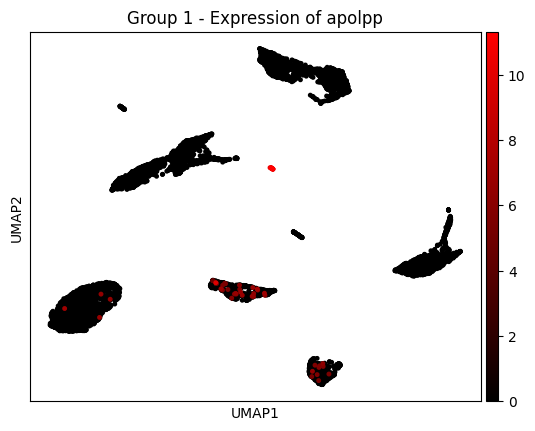

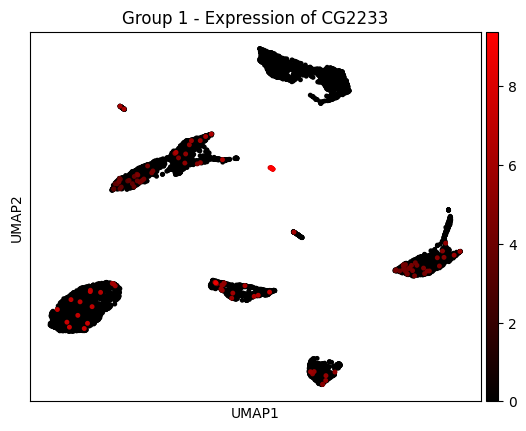

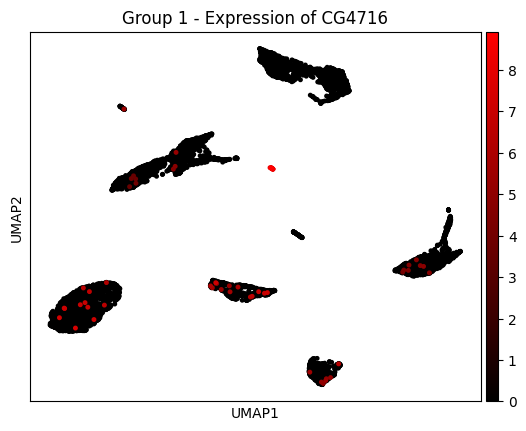

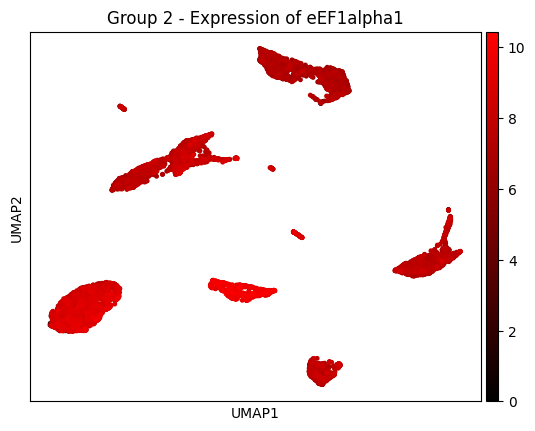

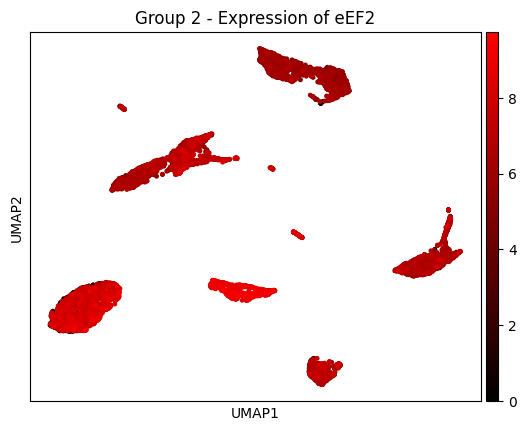

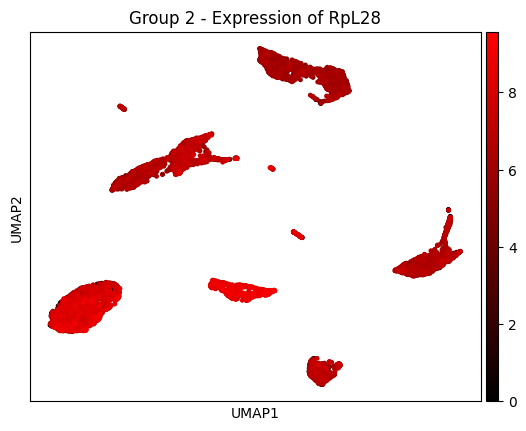

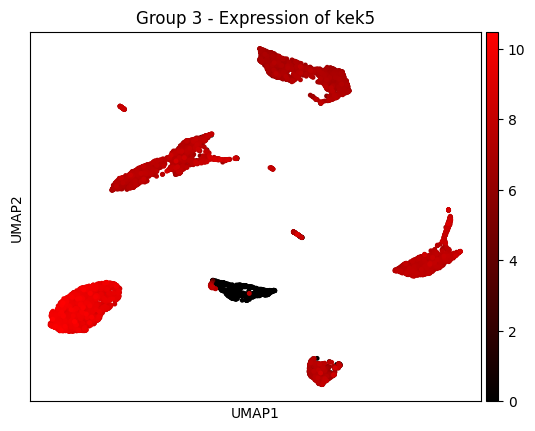

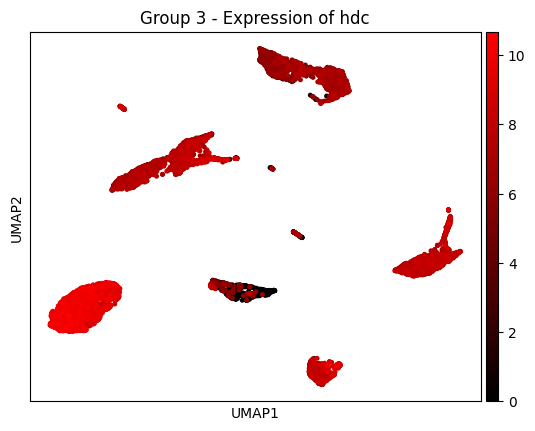

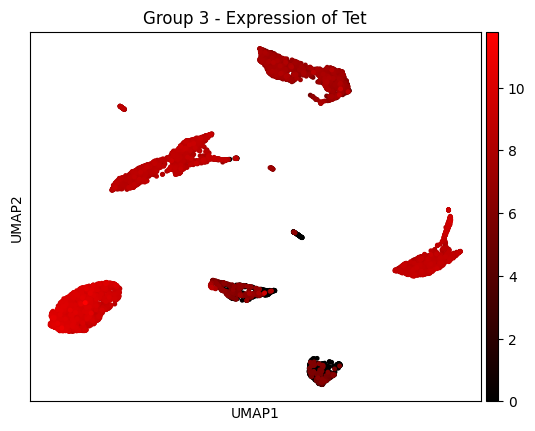

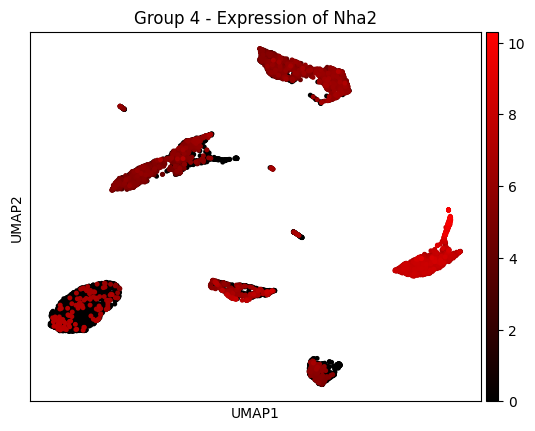

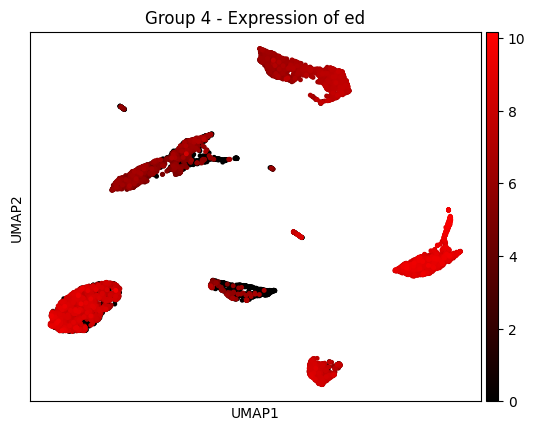

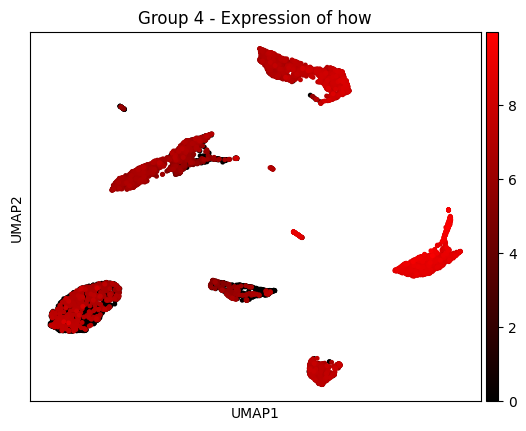

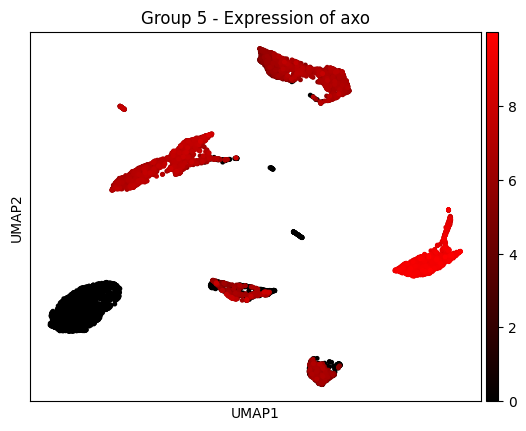

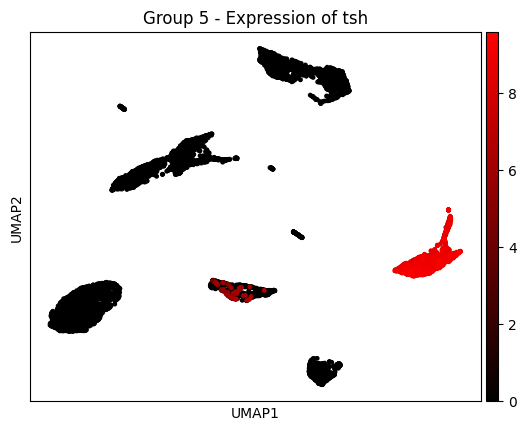

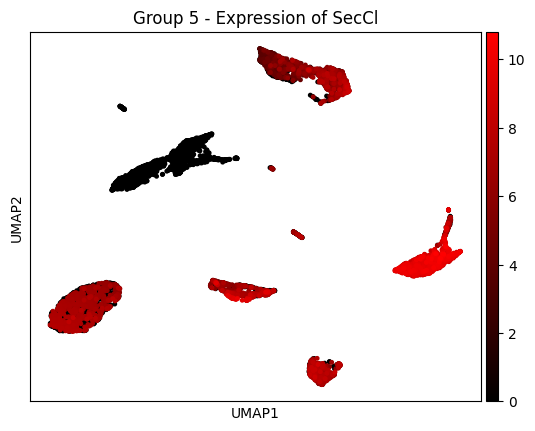

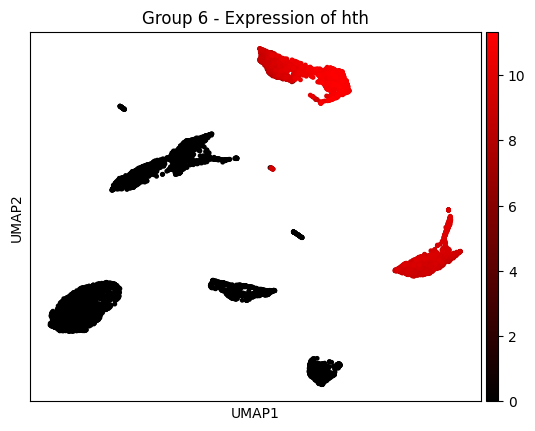

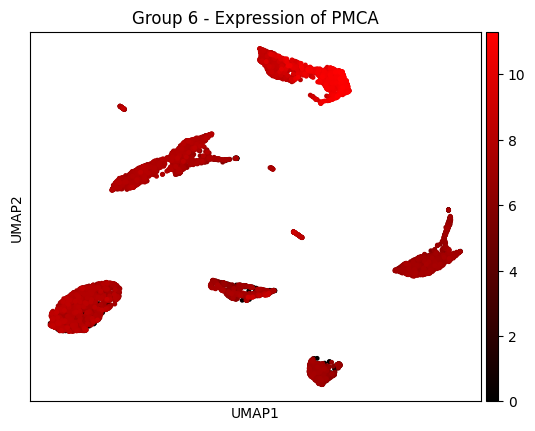

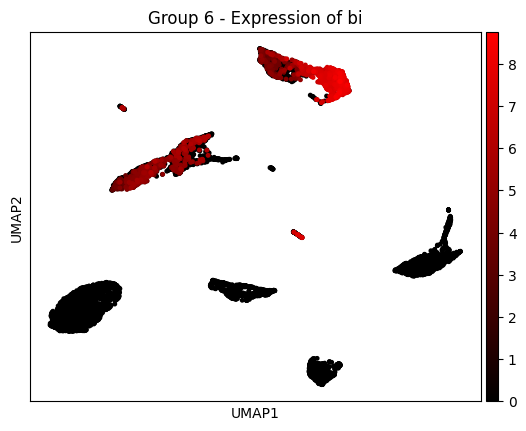

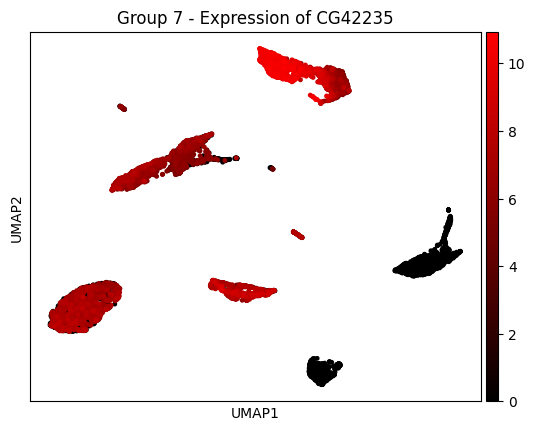

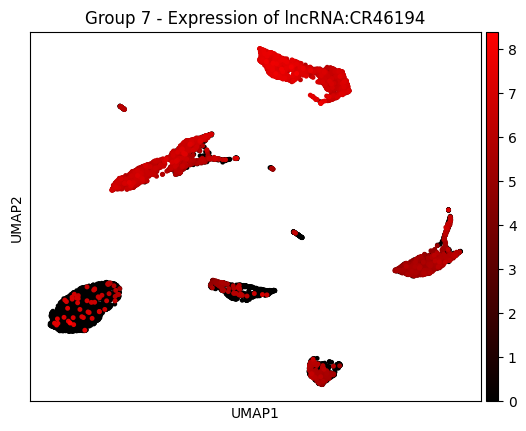

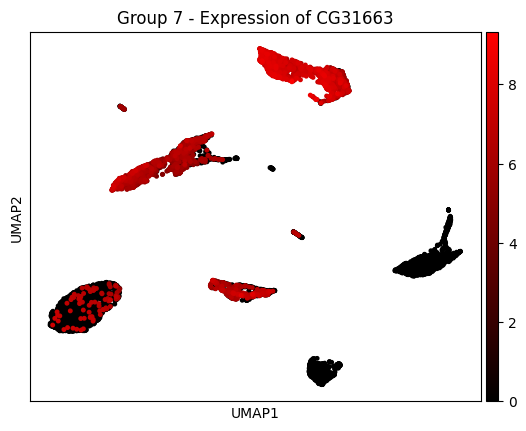

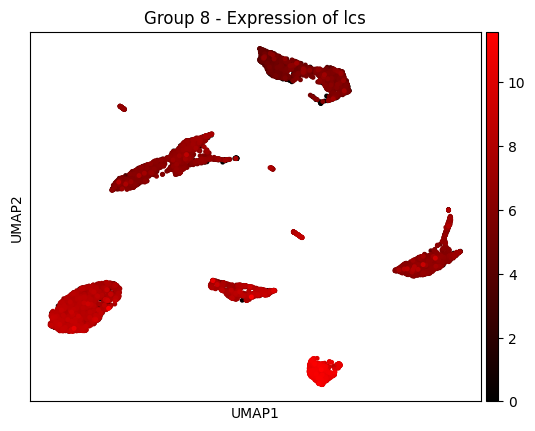

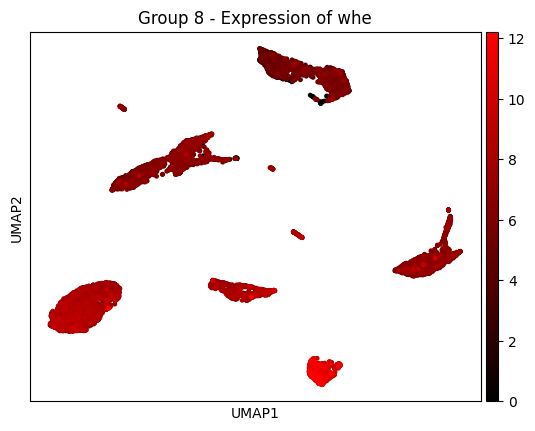

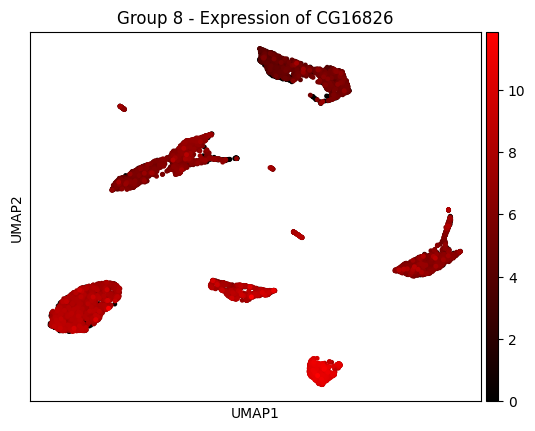

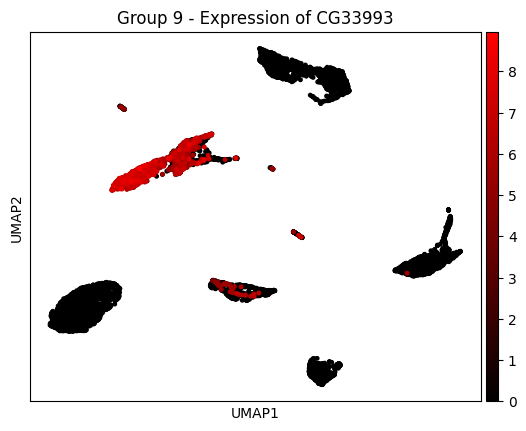

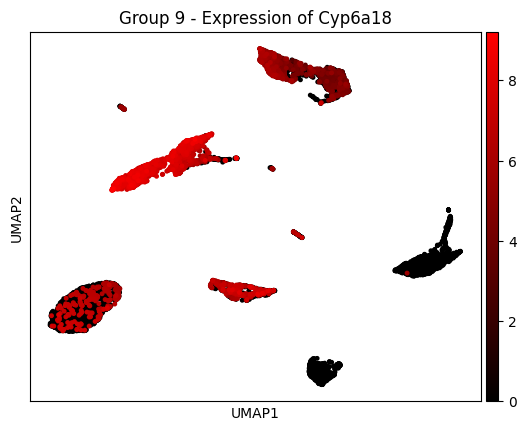

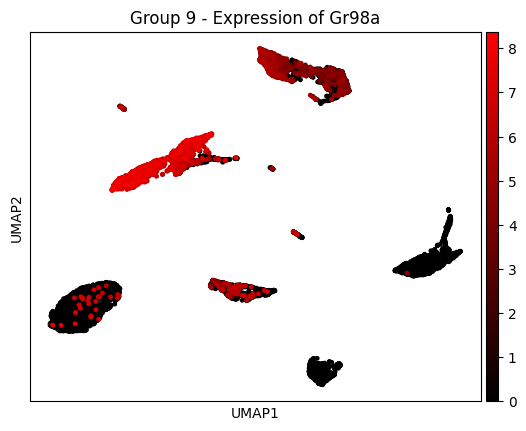

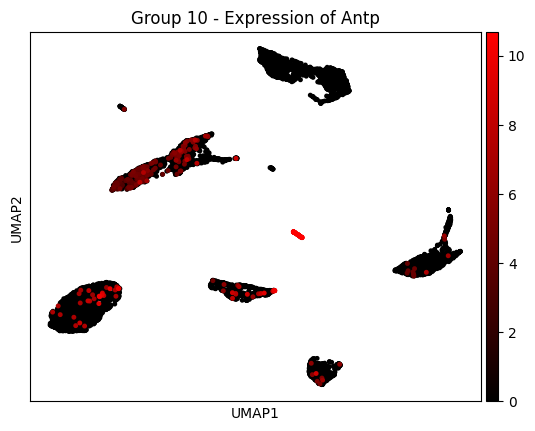

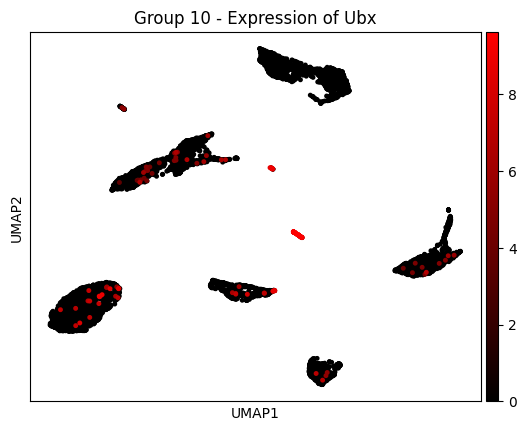

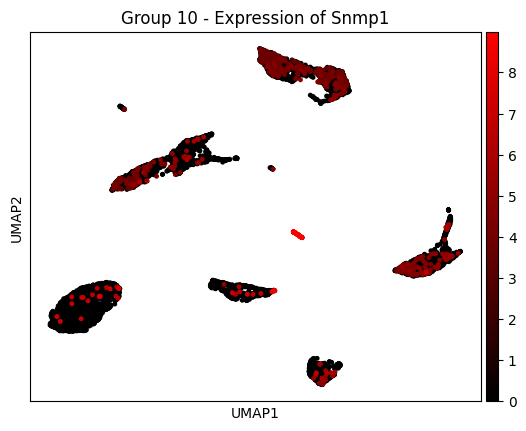

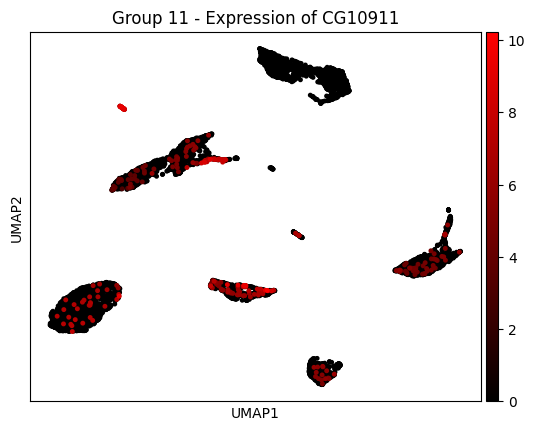

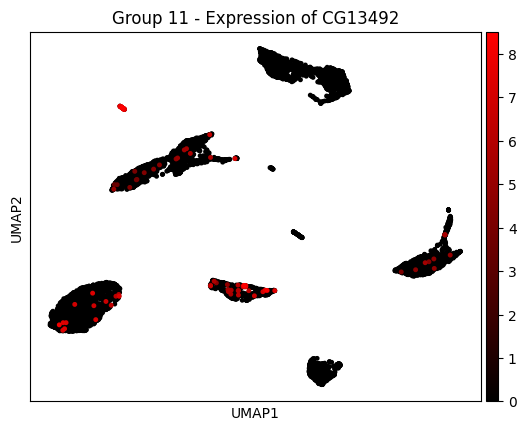

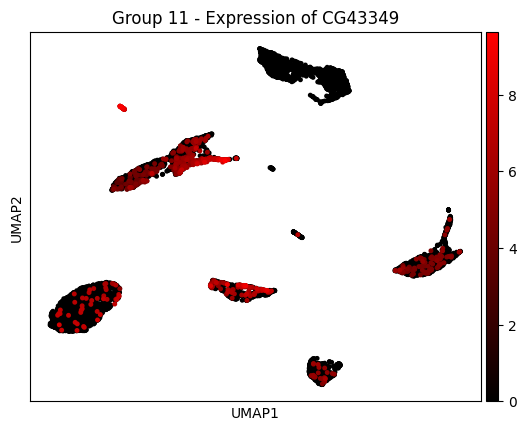

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Define a custom black-to-red colormap
black_red_cmap = LinearSegmentedColormap.from_list('black_red', ['black', 'red'])

# Extract the top 3 genes for each Leiden cluster
top_genes = []
group_titles = []

for group in data.obs['leiden'].cat.categories:
    genes = data.uns['rank_genes_groups']['names'][group][:3]  # Top 3 genes for this group
    top_genes.extend(genes)
    group_titles.extend([f"Group {group}"] * len(genes))

# Plot UMAP for each top gene, colored by expression
for gene in top_genes:
    group_name = group_titles[top_genes.index(gene)]
    sc.pl.umap(
        data,
        color=gene,
        title=f'{group_name} - Expression of {gene}',  # Title includes group name and gene
        ncols=2,
        size=50,
        cmap=black_red_cmap
    )